In [178]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [179]:
df = pd.read_csv('BD preprocesada II.csv',sep=',')

# Formatear columna Fecha como datetime

df['Fecha'] = pd.to_datetime(df['Fecha'])

df

,Fecha,AUM FIC,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
0,2018-01-01,4.277819e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.68,...,0.052668,0.055417,0.052354,0.058845,0.057049,0.061108,0.052959,0.058457,286.55,2940.94
1,2018-01-02,4.346588e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.052668,0.055417,0.052354,0.058845,0.057049,0.061108,0.052959,0.058457,286.55,2940.94
2,2018-01-03,4.427526e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.053122,0.056538,0.054354,0.059277,0.055647,0.065069,0.052840,0.064005,286.55,2940.94
3,2018-01-04,4.457223e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.050867,0.054752,0.053794,0.058336,0.056066,0.066029,0.052695,0.064102,286.55,2908.68
4,2018-01-05,4.464074e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.051841,0.055389,0.054582,0.056345,0.055165,0.062512,0.052718,0.057780,286.55,2885.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,2024-08-03,8.276074e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2429,2024-08-04,8.277857e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2430,2024-08-05,8.297109e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2431,2024-08-06,8.339252e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05


In [180]:
# Seleccionar la variable de interés

new_df = df[['AUM FIC']]

In [181]:
# Seleccionar un conjunto de entrenamiento del 90% de los datos

new_df = new_df.head(2189)

new_df

,AUM FIC
0,4.277819e+07
1,4.346588e+07
2,4.427526e+07
3,4.457223e+07
4,4.464074e+07
...,...
2184,7.031676e+07
2185,7.108143e+07
2186,7.077591e+07
2187,7.149507e+07


In [182]:
# Incluir los valores del conjunto de prueba

for n in range(244):

    new_df.loc[len(new_df)] = [int(new_df.iloc[len(new_df)-1][0])+1]

new_df

C:\Users\OmarAndresMontanezMu\AppData\Local\Temp\ipykernel_4284\920322101.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_df.loc[len(new_df)] = [int(new_df.iloc[len(new_df)-1][0])+1]
C:\Users\OmarAndresMontanezMu\AppData\Local\Temp\ipykernel_4284\920322101.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_df.loc[len(new_df)] = [int(new_df.iloc[len(new_df)-1][0])+1]
C:\Users\OmarAndresMontanezMu\AppData\Local\Temp\ipykernel_4284\920322101.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

,AUM FIC
0,4.277819e+07
1,4.346588e+07
2,4.427526e+07
3,4.457223e+07
4,4.464074e+07
...,...
2428,7.163064e+07
2429,7.163064e+07
2430,7.163064e+07
2431,7.163064e+07


In [183]:
# Predecir con media movil

new_df = df[['AUM FIC']]

new_df['MA'] = new_df['AUM FIC'].rolling(window=30).mean().shift(1)

new_df

C:\Users\OmarAndresMontanezMu\AppData\Local\Temp\ipykernel_4284\1645412179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MA'] = new_df['AUM FIC'].rolling(window=30).mean().shift(1)


,AUM FIC,MA
0,4.277819e+07,NaN
1,4.346588e+07,NaN
2,4.427526e+07,NaN
3,4.457223e+07,NaN
4,4.464074e+07,NaN
...,...,...
2428,8.276074e+07,7.893441e+07
2429,8.277857e+07,7.910262e+07
2430,8.297109e+07,7.927829e+07
2431,8.339252e+07,7.945960e+07


In [184]:
# Serie de los valores reales del conjunto de prueba

actual = new_df['AUM FIC'].tail(244)

actual

2189    7.166162e+07
2190    7.168472e+07
2191    7.169330e+07
2192    7.217912e+07
2193    7.232247e+07
            ...     
2428    8.276074e+07
2429    8.277857e+07
2430    8.297109e+07
2431    8.339252e+07
2432    8.335225e+07
Name: AUM FIC, Length: 244, dtype: float64

In [185]:
# Serie de los valores predichos

forecast = new_df['MA'].tail(244)

forecast

2189    7.088329e+07
2190    7.093026e+07
2191    7.095475e+07
2192    7.095441e+07
2193    7.096940e+07
            ...     
2428    7.893441e+07
2429    7.910262e+07
2430    7.927829e+07
2431    7.945960e+07
2432    7.965443e+07
Name: MA, Length: 244, dtype: float64

In [186]:
# Función para calcular las métricas

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

In [187]:
# Métricas del modelo de medias moviles

metricas_LSTM_1 = calculate_metrics(actual,forecast)

metricas_LSTM_1

(3842350135361.629, 1960191.3517209562, 1658810.9140415895, 2.1500100234710153)

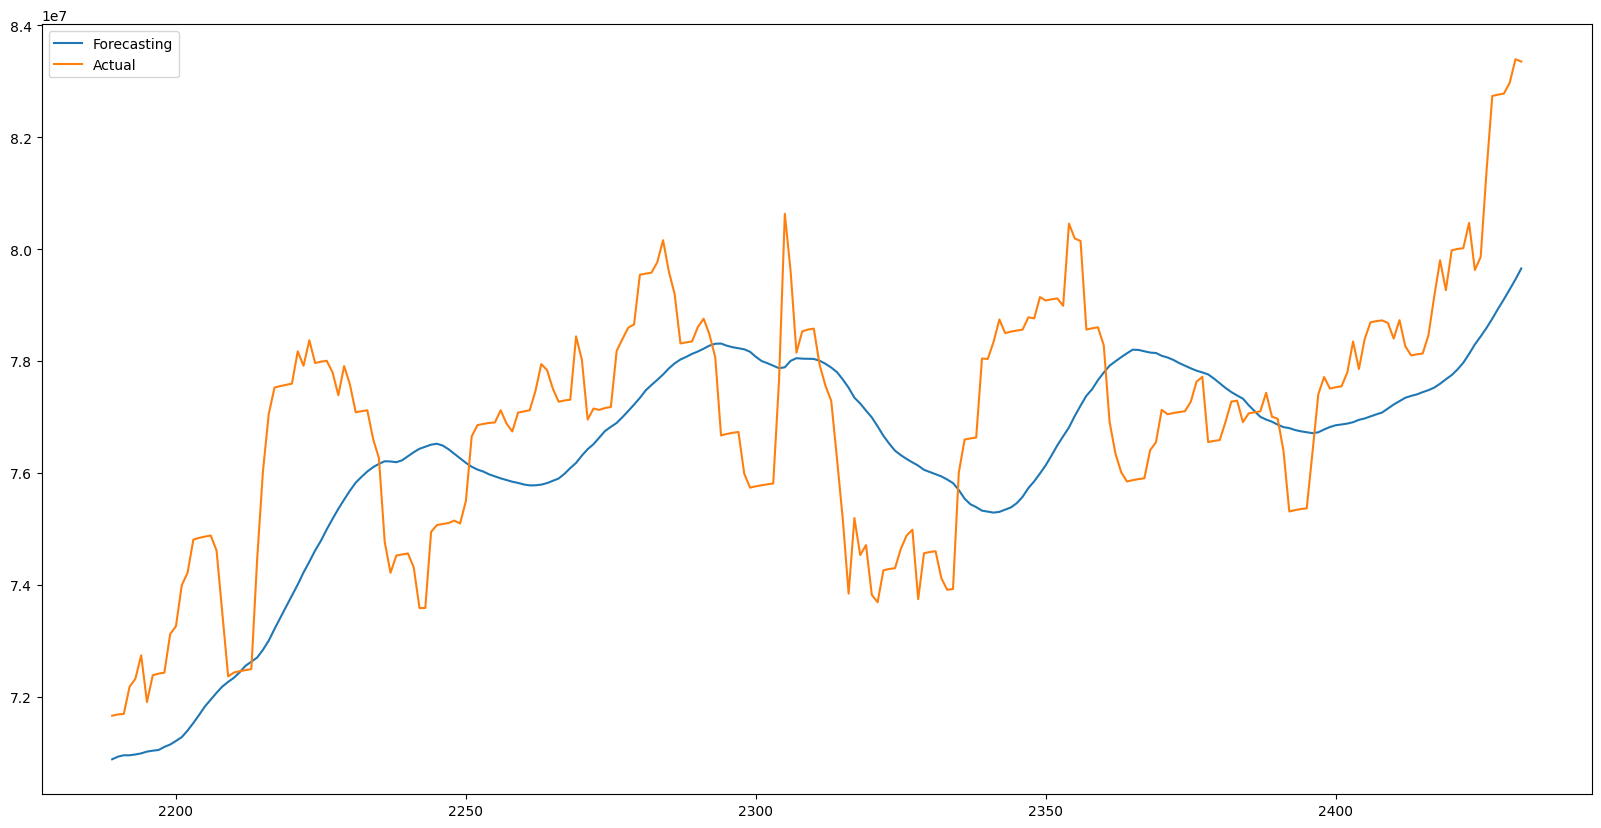

In [188]:
# Graficar los valores reales y los valores predichos

plt.subplots(figsize = (20,10))

plt.plot(forecast,label = 'Forecasting')

# plt.plot(ts,label = 'RSME TRAIN')

plt.plot(actual,label = 'Actual')

plt.legend()